# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

Estudiante: José Quiros

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [2]:
# 1.
# Limpieza de corpus
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

# Configurar NLTK
stop_words = set(stopwords.words('english'))
english_vocab = set(w.lower() for w in words.words())  # Conjunto de palabras válidas en inglés
lemmatizer = WordNetLemmatizer()

# Función de limpieza
def limpiar_documento(doc):
    doc = doc.lower()  # Minúsculas
    doc = re.sub(r'[^a-z\s]', '', doc)  # Solo letras y espacios
    tokens = doc.split()

    # Filtrar: lematizar, quitar stopwords, y conservar solo palabras válidas en inglés
    tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and token in english_vocab
    ]

    return ' '.join(tokens)



corpus_limpio = [limpiar_documento(doc) for doc in newsgroupsdocs]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
# 2.
# Matriz de términos y frecuencia de documentos

In [4]:
# TF
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # Permite obtener el diccionario y generar el TF
tf_matrix = vectorizer.fit_transform(corpus_limpio)


tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
#tf_df

In [5]:
# DF
df_df = tf_df[tf_df > 0].count(axis=0)
#df_df

In [6]:
#Limpieza para memoria
import gc
import psutil
del df_df
del tf_df
del tf_matrix
del vectorizer
del newsgroups
del CountVectorizer

gc.collect()

#mem = psutil.virtual_memory()
#print(f"Memoria usada: {mem.used / 1e9:.2f} GB")

0

In [7]:
#3.
# Cálculo de TF-IDF con Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_limpio)

In [8]:
#4.
# Visualización en un dataframe de pandas
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,aa,aam,aaron,ab,abandon,abandoned,abandonment,abate,abatement,abba,...,zoom,zoophile,zoophilia,zoroastrian,zoroastrianism,zorro,zounds,zulu,zuni,zygon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [9]:
# 1.
# Vectorizar una consulta
query = "Sorry Mike"
query_vector = tfidf_vectorizer.transform([limpiar_documento(query)])

In [10]:
# 2.
# Calcular similitud coseno
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(query_vector, tfidf_matrix)

In [11]:
# 3.
# Ranking: para ello, se ordena los indices de cos_sim de manera descendente, considerando que cada uno representa al documento en determinado indice
import numpy as np

sorted_indices = np.argsort(-(cos_sim.flatten())) # se utiliza el menos para variar el orden de ascendente a descendente

In [12]:
# 4.
# Resultados en una tabla de los 10 más relevantes
cantidad_resultados=10
datos = [[newsgroupsdocs[sorted_indices[i]], cos_sim[0][sorted_indices[i]]] for i in range(cantidad_resultados)]
#print (datos)

tabla = pd.DataFrame(datos, columns=["Contenido", "Similitud coseno"], index=sorted_indices[:cantidad_resultados])
tabla

,Contenido,Similitud coseno
9417,Sorry Mike! What defensemen would the Wings be...,0.724972
5469,Someone was looking for these a few weeks ago ...,0.400117
5119,"\nCite source, please.\n\n\n--Mike\n\n\n\n",0.384513
15181,\nSorry again. I guess you need my address.,0.360126
2277,\nCam chain.\n\n -Mike,0.345700
16135,Greetings!\n\n Sorry for the ty...,0.342929
11794,Tracy your monitor is on its way. Mike Damico\...,0.334919
17915,"Sorry, _perijoves_...I'm not used to talking t...",0.334589
17224,\n\n \n\n\n\n\nWhat about Thaaammy Thotha? I f...,0.331215
7305,ok - sorry about that...i didn't realise he wa...,0.325783


## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [13]:
!pip install rank_bm25

In [14]:
#es necesario prepocesar el texto, este recibe ya los elementos tokenizados
import re
pattern = r"(?u)\b\w\w+\b"

corpus_tokenizado = [re.findall(pattern, doc) for doc in corpus_limpio]
#print (corpus_tokenizado)

In [15]:
# 1.
# modelo
from rank_bm25 import BM25Okapi
bm25_vectorizer = BM25Okapi(corpus_tokenizado)

In [16]:
# 2.
# query
query_tokenizado = re.findall(pattern, limpiar_documento(query))
#print (query_tokenizado)

In [17]:
#modelo ofece una funcion para obtener los docs más relevantes
bm25_docs = bm25_vectorizer.get_top_n(query_tokenizado, newsgroupsdocs, n=10)
print(bm25_docs)

['Sorry Mike! What defensemen would the Wings be willing to give up for Beezer?', 'ok - sorry about that...i didn\'t realise he was being sarcastic about\n those sort of things.\n\nbut i\'ll tell you, mike lupica (daily news) usually says some pretty\n funny things in his "shooting from the lip" columns...', '\nWell, maybe it will be.  Banks is a 24 year-old prospect who "hasn\'t \nmatured as quickly as they would have liked.  Mahomes is a 22 year-old \nwho is very highly touted.  Tapani and Erickson are also young, and \nhave looked very good this spring.  The last spot was between Jim \nDeshaies, formerly of Houston and S.D. and Mike Trombley.  Deshaies \nhasn\'t looked very good this spring, so I believe that the spot has \ngone to Trombley, although they hadn\'t wanted 3 starters this unproven. \nI personally believe very highly in Mahomes and Trombley.\n\n\nWell, Scott Leius is the shortstop.  He played mostly 3B last year, but \nwas a SS in the minors, and moved back after Gagne 

In [18]:
# 3.
# ranking
bm25_scores = bm25_vectorizer.get_scores(query_tokenizado)
#bm25_scores

In [19]:
import numpy as np
sorted_indices = np.argsort(-(bm25_scores)) # se utiliza el menos para variar el orden de ascendente a descendente

In [20]:
# presentación de n más relevantes
cantidad_resultados=10
datos = [[newsgroupsdocs[sorted_indices[i]], bm25_scores[sorted_indices[i]]] for i in range(cantidad_resultados)]
#print (datos)

tabla = pd.DataFrame(datos, columns=["Contenido", "Score BM25"], index=sorted_indices[:cantidad_resultados])
tabla

,Contenido,Score BM25
9417,Sorry Mike! What defensemen would the Wings be...,13.230357
7305,ok - sorry about that...i didn't realise he wa...,11.842445
13691,"\nWell, maybe it will be. Banks is a 24 year-...",8.404120
5037,\nMike Terry asks:\n\nNo Mike. It is imposibl...,7.937946
16758,\n\nI took an alcohol server's class a few yea...,7.821817
647,": Sorry, I did`nt tell exactly what I need.\n:...",7.714908
7173,Me> The understanding and ability to swerve wa...,7.701086
4905,: >\n: >ATLANTIC DIVISION\n: >\t\n: >\tST JOHN...,7.662541
371,Did you ever notice how many people on the net...,7.559460
9277,"Mike Sixsmith, on the 16 Apr 93 10:07:55 GMT w...",7.376690


In [21]:
# 4. Comparación Manual
def recortar (doc, max=20):
  if len(doc) > max:
    return doc[:max] + "..."
  else:
    return doc


# Def sin etiquetas: comparacion_df = pd.DataFrame(list(zip(map(recortar,newsgroupsdocs), cos_sim.flatten(), bm25_scores)))

comparacion_df = pd.DataFrame({
  "Documento": map(recortar, newsgroupsdocs),
  "Similitud coseno": cos_sim.flatten(),
  "Score BM25": bm25_scores
})
comparacion_df.head(20)

,Documento,Similitud coseno,Score BM25
0,\n\nI am sure some bas...,0.0,0.0
1,My brother is in the...,0.0,0.0
2,\n\n\n\n\tFinally you sai...,0.0,0.0
3,\nThink!\n\nIt's the SC...,0.0,0.0
4,1) I have an old ...,0.0,0.0
5,\n\nBack in high schoo...,0.0,0.0
6,\n\nAE is in Dallas......,0.0,0.0
7,\n[stuff deleted]\n\nOk...,0.0,0.0
8,"\n\n\nYeah, it's the se...",0.0,0.0
9,\nIf a Christian mean...,0.0,0.0


In [22]:
# más relevantes segun bm25_scores
comparacion_df.sort_values(by="Score BM25", ascending=False).head(20)

,Documento,Similitud coseno,Score BM25
9417,Sorry Mike! What def...,0.724972,13.230357
7305,ok - sorry about tha...,0.325783,11.842445
13691,"\nWell, maybe it will...",0.162287,8.404120
5037,\nMike Terry asks:\n\nN...,0.272398,7.937946
16758,\n\nI took an alcohol ...,0.141073,7.821817
647,": Sorry, I did`nt te...",0.135649,7.714908
7173,Me> The understandin...,0.289918,7.701086
4905,: >\n: >ATLANTIC DIVI...,0.138085,7.662541
371,Did you ever notice ...,0.309188,7.559460
9277,"Mike Sixsmith, on th...",0.272802,7.376690


In [23]:
# más relevantes segun sim_cos
comparacion_df.sort_values(by="Similitud coseno", ascending=False).head(20)

,Documento,Similitud coseno,Score BM25
9417,Sorry Mike! What def...,0.724972,13.230357
5469,Someone was looking ...,0.400117,7.151507
5119,"\nCite source, please...",0.384513,7.236316
15181,\nSorry again. I gue...,0.360126,6.150937
2277,\nCam chain.\n\n -Mike,0.345700,7.323159
16135,Greetings!\n\n ...,0.342929,6.224755
11794,Tracy your monitor i...,0.334919,7.236316
17915,"Sorry, _perijoves_.....",0.334589,6.150937
17224,\n\n \n\n\n\n\nWhat about T...,0.331215,6.078849
7305,ok - sorry about tha...,0.325783,11.842445


In [24]:
ranking_cos_sim = np.argsort(-cos_sim.flatten()).tolist()
ranking_bm25 = np.argsort(-bm25_scores).tolist()

docs_ranking = pd.DataFrame({
    "Documento": map(recortar, newsgroupsdocs),
    "Similitud coseno": [ranking_cos_sim.index(i) for i in range(len(ranking_cos_sim))],
    "BM25": [ranking_bm25.index(i) for i in range(len(ranking_bm25))]
})
docs_ranking.head(20)

,Documento,Similitud coseno,BM25
0,\n\nI am sure some bas...,18845,18845
1,My brother is in the...,830,830
2,\n\n\n\n\tFinally you sai...,829,829
3,\nThink!\n\nIt's the SC...,828,828
4,1) I have an old ...,827,827
5,\n\nBack in high schoo...,826,826
6,\n\nAE is in Dallas......,825,825
7,\n[stuff deleted]\n\nOk...,824,824
8,"\n\n\nYeah, it's the se...",823,823
9,\nIf a Christian mean...,822,822


In [25]:
# viendo los documentos más representativos para cos_sim
docs_ranking.reindex(comparacion_df.sort_values(by="Similitud coseno", ascending=False).index.values).head(20)

,Documento,Similitud coseno,BM25
9417,Sorry Mike! What def...,0,0
5469,Someone was looking ...,1,14
5119,"\nCite source, please...",2,12
15181,\nSorry again. I gue...,3,72
2277,\nCam chain.\n\n -Mike,4,10
16135,Greetings!\n\n ...,5,63
11794,Tracy your monitor i...,6,13
17915,"Sorry, _perijoves_.....",7,70
17224,\n\n \n\n\n\n\nWhat about T...,8,79
7305,ok - sorry about tha...,9,1


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [26]:
# Gráfica
# 1. Normalización con Escalado Min-Max
from sklearn.preprocessing import MinMaxScaler

attr_numericas = comparacion_df.select_dtypes(include="number").columns

scaler = MinMaxScaler()
comparacion_df_norm = pd.DataFrame(scaler.fit_transform(comparacion_df[attr_numericas]), columns=attr_numericas)

comparacion_df_norm.sort_values(by="Score BM25", ascending=False).head(5)

,Similitud coseno,Score BM25
9417,1.000000,1.000000
7305,0.449374,0.895096
13691,0.223852,0.635215
5037,0.375735,0.599980
16758,0.194591,0.591202


In [27]:
comparacion_df.sort_values(by="Score BM25", ascending=False).head(5)

,Documento,Similitud coseno,Score BM25
9417,Sorry Mike! What def...,0.724972,13.230357
7305,ok - sorry about tha...,0.325783,11.842445
13691,"\nWell, maybe it will...",0.162287,8.404120
5037,\nMike Terry asks:\n\nN...,0.272398,7.937946
16758,\n\nI took an alcohol ...,0.141073,7.821817


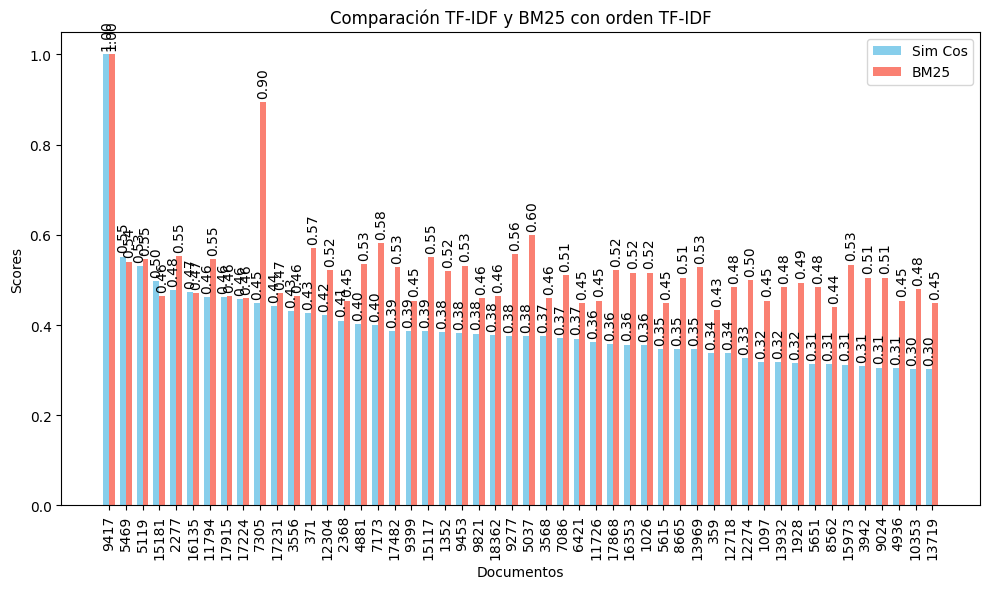

In [28]:
# Gráfica de x cantidad de elementos
def graficar (corpus, dataframe, elementos,title,max=10):
  import matplotlib.pyplot as plt
  import numpy as np

  cantidad = min(max, len(corpus))
  x = np.arange(cantidad)
  ancho_barra = 0.35

  #Crear el gráfico
  fig, ax = plt.subplots(figsize=(10,6))
  b1=ax.bar(x - ancho_barra/2, dataframe[elementos[0]] [:cantidad], ancho_barra, label='Sim Cos',color="skyblue")
  b2=ax.bar(x + ancho_barra/2, dataframe[elementos[1]][:cantidad], ancho_barra, label='BM25', color="salmon")

  #Etiquetas y titulo
  ax.set_xlabel('Documentos')
  ax.set_ylabel('Scores')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.legend()

  #Valores encima de las barras
  for bar in b1 + b2:
      height = bar.get_height()
      ax.annotate(f'{height:.2f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=10,
                  rotation=90)

  plt.xticks(ticks=x, labels=dataframe.index.values[:cantidad],
             rotation=90)

  #Mostrar grafico
  plt.tight_layout()
  plt.show()

# Gráfica de los scores obtenidos
graficar(newsgroupsdocs, comparacion_df_norm.sort_values(by="Similitud coseno", ascending=False), ["Similitud coseno", "Score BM25"],'Comparación TF-IDF y BM25 con orden TF-IDF' ,max=50)

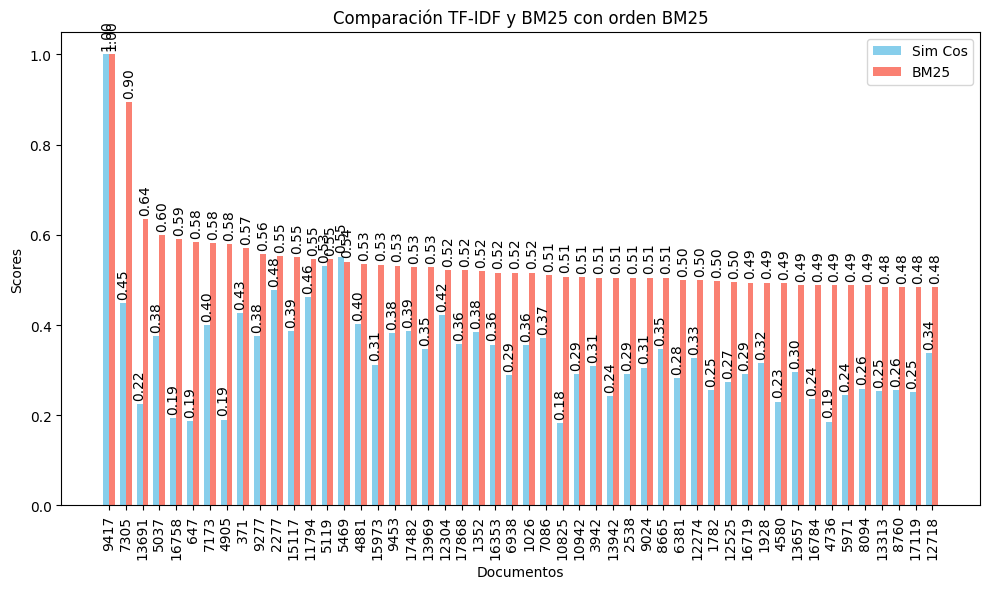

In [29]:
# Gráfica con los scores normalizados
graficar(newsgroupsdocs, comparacion_df_norm.sort_values(by="Score BM25", ascending=False), ["Similitud coseno", "Score BM25"], 'Comparación TF-IDF y BM25 con orden BM25',max=50)

In [30]:
# 2. Ver ranking visualmente
docs_ranking.head(20)

,Documento,Similitud coseno,BM25
0,\n\nI am sure some bas...,18845,18845
1,My brother is in the...,830,830
2,\n\n\n\n\tFinally you sai...,829,829
3,\nThink!\n\nIt's the SC...,828,828
4,1) I have an old ...,827,827
5,\n\nBack in high schoo...,826,826
6,\n\nAE is in Dallas......,825,825
7,\n[stuff deleted]\n\nOk...,824,824
8,"\n\n\nYeah, it's the se...",823,823
9,\nIf a Christian mean...,822,822


In [31]:
#3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
"""
En TF-IDF los documentos que obtienen un score más alto son aquellos que tengan una dirección más parecida con la query.
En BM25 los documentos obtienen una estimación de su relevancia, considerando la presencia de términos relevantes, el tamaño del documento y otros parámetros.
"""


'\nEn TF-IDF los documentos que obtienen un score más alto son aquellos que tengan una dirección más parecida con la query.\nEn BM25 los documentos obtienen una estimación de su relevancia, considerando la presencia de términos relevantes, el tamaño del documento y otros parámetros.\n'

In [32]:
query_df = pd.DataFrame(query_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [33]:
query_df_different_0 = query_df.loc[:, (query_df != 0).any(axis=0)]
query_df_different_0

,mike,sorry
0,0.749984,0.661456


In [34]:
# Presentar los 3 documentos más relevantes
def presentar_documentos_relevantes(cantidad, comparacion_df_norm, corpus, query_df_0, modelo="Similitud coseno"):
    docs = comparacion_df_norm.sort_values(by=modelo, ascending=False)[:cantidad]

    for i in docs.index.values:
      doc = corpus[i]
      print (f"Documento [{i}]")
      print("--------------------------------------------------------------------------------")
      print (f"Contenido:\n {doc}")
      print("--------------------------------------------------------------------------------")
      print (f"Resultado:")
      print (f"TF-IDF:", comparacion_df_norm.loc[i, "Similitud coseno"])
      print (f"BM25:",comparacion_df_norm.loc[i, "Score BM25"])
      print (f"Longitud de doc: {len(doc)}")
      print (f"  Términos/Cantidad")
      doc_procesado = limpiar_documento(doc)
      for terms in query_df_0:
        print (f"\t-{terms}: {doc_procesado.count(terms)}")
      print("--------------------------------------------------------------------------------")
      print("\n")

In [35]:
presentar_documentos_relevantes(3, comparacion_df_norm, newsgroupsdocs, query_df_different_0)

Documento [9417]
--------------------------------------------------------------------------------
Contenido:
 Sorry Mike! What defensemen would the Wings be willing to give up for Beezer?
--------------------------------------------------------------------------------
Resultado:
TF-IDF: 1.0
BM25: 1.0
Longitud de doc: 77
  Términos/Cantidad
	-mike: 1
	-sorry: 1
--------------------------------------------------------------------------------


Documento [5469]
--------------------------------------------------------------------------------
Contenido:
 Someone was looking for these a few weeks ago - check out comp.dsp
Mike.

--------------------------------------------------------------------------------
Resultado:
TF-IDF: 0.5519067140252855
BM25: 0.5405377645239028
Longitud de doc: 73
  Términos/Cantidad
	-mike: 1
	-sorry: 0
--------------------------------------------------------------------------------


Documento [5119]
-----------------------------------------------------------------

In [36]:
presentar_documentos_relevantes(3, comparacion_df_norm, newsgroupsdocs, query_df_different_0,modelo="Score BM25")

Documento [9417]
--------------------------------------------------------------------------------
Contenido:
 Sorry Mike! What defensemen would the Wings be willing to give up for Beezer?
--------------------------------------------------------------------------------
Resultado:
TF-IDF: 1.0
BM25: 1.0
Longitud de doc: 77
  Términos/Cantidad
	-mike: 1
	-sorry: 1
--------------------------------------------------------------------------------


Documento [7305]
--------------------------------------------------------------------------------
Contenido:
 ok - sorry about that...i didn't realise he was being sarcastic about
 those sort of things.

but i'll tell you, mike lupica (daily news) usually says some pretty
 funny things in his "shooting from the lip" columns...
--------------------------------------------------------------------------------
Resultado:
TF-IDF: 0.44937361436431744
BM25: 0.8950964612326829
Longitud de doc: 218
  Términos/Cantidad
	-mike: 1
	-sorry: 1
------------------

In [37]:
#4. Sugiere: ¿A qué se podría deber esta diferencia?
"""
En primer lugar, son modelos basados en enfoques distintos. Donde,
TF-IDF desarrolla una representación vectorial y obtiene un ranking a través de
la correlación entre dos vectores. En cambio, BM25 estima la relevancia
del documento en referencia a su contenido.
Además, BM25 incorporá en su cálculo el tamaño del documento y la saturación por
término.
"""

'\nEn primer lugar, son modelos basados en enfoques distintos. Donde,\nTF-IDF desarrolla una representación vectorial y obtiene un ranking a través de\nla correlación entre dos vectores. En cambio, BM25 estima la relevancia\ndel documento en referencia a su contenido.\nAdemás, BM25 incorporá en su cálculo el tamaño del documento y la saturación por\ntérmino.\n'

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?


In [38]:
query = "New Technology"

In [39]:
#1.
# Documentos relevantes por:
#   1. Contener explícitamente la frase o palabras
#   2. Uso del término de forma significativa
#   3. Relacionado con ideas relacionadas a tecnologías emergentes
documentos_relevantes = [14823, 15807, 11502, 18632, 6803, 6507,6017, 4246, 7895, 16556, 11502]
doc_relevantes = np.array(documentos_relevantes)

doc_relevantes
# Nota: Estos fueron clasificados de manera manual

array([14823, 15807, 11502, 18632,  6803,  6507,  6017,  4246,  7895,
       16556, 11502])

In [40]:
for i in documentos_relevantes:
  print (newsgroupsdocs[i])
  print ("________________________________")

I once read an article on  Computer technology  which stated that 
every new computer technology was actually lower and slower then what it
replaced.  Silicon was less  effective then the germanium  products
then available.   GaAs  was less capable then Silicon.  Multi-processors
were slower then  existent single processors.

What the argument was, though was that these new technologies promised either
theoretically future higher performance  or lower cost or higher densities.

I think that the DC-1  may g=fit into this same model.

ELV's can certainly launch more weight  then  a SSRT,  but 
an SSRT offers the prospect of  greater cycle times and  lower costs.

This is kind of a speculative posting,  but I thought i'd throw it out as
a hjistorical framework  for those interested in the project.
________________________________


  That's because they took the old VT 500 engine and stepped on it to make
  the plant for the Hawk -> "New Twin".  Or does that only fly for Microsoft
  NT (N

In [41]:
# TF-IDF
query_v2 = 0
query_v2 = tfidf_vectorizer.transform([limpiar_documento(query)])
#query_v2

In [42]:
cos_sim_v2 = cosine_similarity(tfidf_matrix, query_v2)
#cos_sim_v2.flatten()

In [43]:
#BM25
bm25_scores_v2 = bm25_vectorizer.get_scores(limpiar_documento(query).split())
#bm25_scores_v2

In [44]:
com_q2 = pd.DataFrame({
  "documentos": newsgroupsdocs,
  "sim_cos": cos_sim_v2.flatten(),
  "bm25": bm25_scores_v2
})

In [45]:
com_q2.sort_values(by="bm25", ascending=False).head(5)

,documentos,sim_cos,bm25
8368,"Hey, does anybody know anything about Leading ...",0.470099,10.670598
6507,\t\t\t ^^\n\t\t\t ||\n\t\t ...,0.377187,10.002659
15807,\n\n That's because they took the old VT 500 ...,0.336374,9.920050
18632,": >: English cars:-\n: >\n: >: Rover, Reliant,...",0.350499,9.763646
14823,I once read an article on Computer technology...,0.272819,9.263620


In [46]:
index= com_q2.sort_values(by="sim_cos",ascending=False)[0:10].index.values
for i in index:
  print("Doc ", i)
  print(com_q2.loc[i, "documentos"])

Doc  6017

the classic references in this area are Jacques Ellul for a
liberal/evangelical perspective and Os Guiness for a straight
evangelical view.  If you want to look at non-christian sources
try Alvin Toffler as the perennial optimist.  His views while
blatently non christian explore where technology may be going.


This is regardless of technology.  Be careful to separate the issues of
related to speed and dispersion of technology (how far the letter
went and how quickly it got there) and the message being passed in the
technology (something that seems to be totally wrong.)


When lecturing in this area I challenge my (non-christan/atheistic) class
about the impact technology has on life, quality of life and the rights
that they consider important.  Depending on how you work out your
faith will determine your response to the use of technology.  For example
friends of mine are considering IVF due to a life threatening situation the
wife is going through; when it is over they will

In [47]:
# 2.
def precision (cantidad, arg, matriz, doc_relevantes):
  indices_relevantes= matriz.sort_values(by=arg, ascending=False)[0:cantidad].index.values
  print (f"idex_recuperados: {indices_relevantes}, relevantes: {doc_relevantes}")
  return np.sum(np.isin(indices_relevantes,doc_relevantes))/cantidad

# Precisión@3 para TF-IDF
prec_tfidf = precision(3, "sim_cos", com_q2, doc_relevantes)
print(f"Precisión@3 TF-IDF:{prec_tfidf}")

idex_recuperados: [6017 4246 7895], relevantes: [14823 15807 11502 18632  6803  6507  6017  4246  7895 16556 11502]
Precisión@3 TF-IDF:1.0


In [48]:
# Precisión@3 para BM25
prec_bm25 = precision(3, "bm25", com_q2, doc_relevantes)
print(f"Precisión@3 BM25:{prec_bm25}")

idex_recuperados: [ 8368  6507 15807], relevantes: [14823 15807 11502 18632  6803  6507  6017  4246  7895 16556 11502]
Precisión@3 BM25:0.6666666666666666


In [49]:
# 3.
"""
Bajo los criterios de relevancia propuestos se concluye que el modelo TF-IDF
tiene una mejor precisión, siendo esta igual a 1.0. Mientras que BM25
tiene una precisión de 0.67.
"""

'\nBajo los criterios de relevancia propuestos se concluye que el modelo TF-IDF\ntiene una mejor precisión, siendo esta igual a 1.0. Mientras que BM25\ntiene una precisión de 0.67.\n'